**Step 1: Get the Data**

In [1]:
# Connect to the google drive to read the larger tabular data file.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [143]:
!pip install dataprep
!pip install symspellpy
!pip install pattern
!pip install pycountry
!pip install pytz
!pip install wordcloud
!pip install inflect
!pip install en
!pip install pynlg
!pip install spacy
!pip install pyinflect
!pip install gensim
!pip install emoji
!pip install bs4
!pip install pyLDAvis

In [161]:
# import required libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import numpy as np
import re
import string
import nltk
import pkg_resources
import pycountry
import pytz
import spacy
import gensim
import emoji
import pyinflect
import pyLDAvis.sklearn

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

from dataprep.clean import clean_country
from matplotlib.cbook import boxplot_stats 
from sklearn import preprocessing 
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from symspellpy import SymSpell, Verbosity
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from pattern.en import conjugate, lemma, lexeme, PRESENT, PL
from requests.structures import CaseInsensitiveDict
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from pyinflect import getAllInflections, getInflection
from pattern.text.en import singularize
from gensim import corpora, models
from gensim.models import CoherenceModel
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# Read the larger csv file.
df=pd.read_csv('drive/My Drive/Eluvio_Folder/Eluvio_DS_Challenge.csv')
#df=vaex.open('drive/My Drive/Eluvio_Folder/Eluvio_DS_Challenge.csv')

In [ ]:
# View the data
df.head()

,time_created,date_created,up_votes,down_votes,title,over_18,author,category
0,1201232046,2008-01-25,3,0,Scores killed in Pakistan clashes,False,polar,worldnews
1,1201232075,2008-01-25,2,0,Japan resumes refuelling mission,False,polar,worldnews
2,1201232523,2008-01-25,3,0,US presses Egypt on Gaza border,False,polar,worldnews
3,1201233290,2008-01-25,1,0,Jump-start economy: Give health care to all,False,fadi420,worldnews
4,1201274720,2008-01-25,4,0,Council of Europe bashes EU&UN terror blacklist,False,mhermans,worldnews


In [ ]:
# Get basic Information about the data

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 509236 entries, 0 to 509235
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   time_created  509236 non-null  int64 
 1   date_created  509236 non-null  object
 2   up_votes      509236 non-null  int64 
 3   down_votes    509236 non-null  int64 
 4   title         509236 non-null  object
 5   over_18       509236 non-null  bool  
 6   author        509236 non-null  object
 7   category      509236 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 27.7+ MB
None


**Step 2: Explore the Data**

**2.1 Basic Exploration of data**

In [ ]:
# 1. Basic Exploration of data 

#I) Number of rows and columns in dataset
print(f"Number of rows in the dataset:  {len(df)}")
print(f"Number of columns in the dataset:  {len(df.columns)}")
print(f"\nColumns in the dataset:  {df.columns}")

#II) Check if there are rows or columns with null values in the dataset

#Counting cells with null values
print(f"\nCells with missing values in the dataset:  {sum(df.isnull().values.ravel())}")

Number of rows in the dataset:  509236
Number of columns in the dataset:  8

Columns in the dataset:  Index(['time_created', 'date_created', 'up_votes', 'down_votes', 'title',
       'over_18', 'author', 'category'],
      dtype='object')

Cells with missing values in the dataset:  0


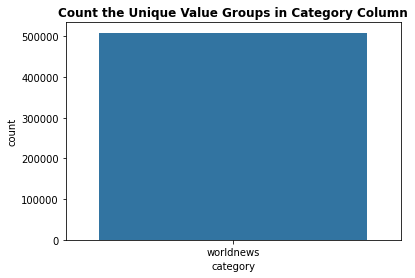

In [ ]:
# From the above exploration now we know our data has 8 columns, 509236 rows without missing data.

# 2. Basic Feature Exploration
# 2.1 Category Column
plt.title('Count the Unique Value Groups in Category Column',fontweight="bold")
sns.countplot(x=df['category'])

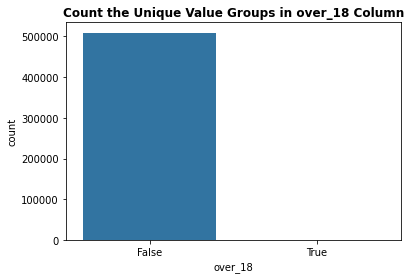

In [ ]:
# 2.2 Over_18 Column
plt.title('Count the Unique Value Groups in over_18 Column',fontweight="bold")
sns.countplot(x=df['over_18'])

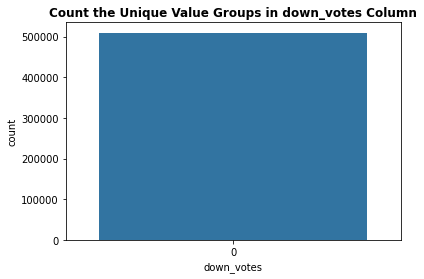

In [ ]:
# 2.3 down_votes Column
plt.title('Count the Unique Value Groups in down_votes Column',fontweight="bold")
sns.countplot(x=df['down_votes'])

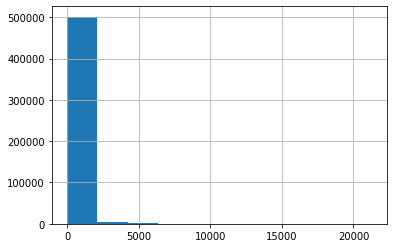

In [ ]:
# 2.4 Up_votes distribution
df['up_votes'].hist()

In [ ]:
# 2.4 Number of unique values in each of other columns
print(f"Number of unique values in the up_votes column: {df.up_votes.nunique()}")
print(f"Number of unique values in the authour column: {df.author.nunique()}")

Number of unique values in the up_votes column: 5782
Number of unique values in the authour column: 85838


In [ ]:
# 3. Select the final data frame for further exploration.
# From 2.1, 2.2 and 2.3 we know that category, over_18 and down_votes columns have only 1 value.
# Therefore, they do not provide valuable information.
# So we will remove those columns.

selected_cols=['time_created', 'date_created', 'up_votes','title', 'author']
df = df.filter(selected_cols, axis=1)
df.head()

,time_created,date_created,up_votes,title,author
0,1201232046,2008-01-25,3,Scores killed in Pakistan clashes,polar
1,1201232075,2008-01-25,2,Japan resumes refuelling mission,polar
2,1201232523,2008-01-25,3,US presses Egypt on Gaza border,polar
3,1201233290,2008-01-25,1,Jump-start economy: Give health care to all,fadi420
4,1201274720,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,mhermans


In [ ]:
# Check the number of words in titles and group them by
titles_token=df['title']
count = [len(title) for title in titles_token]
pd.Series(count).value_counts()

59     10019
60      9920
55      9851
54      9762
58      9607
       ...  
310        1
309        1
4          1
305        1
2          1
Length: 311, dtype: int64

**2.2 Advance Exploration of Data**


*   After removing columns we are left with 5 columns. So, before decide what to do we should unwrap and dive into the provided details to find what is hidden within the given data. 





**Feature Exploration Steps:**


1.   Using the given time_created values find the time.
2.   Use the given date and find: year, month, day and the name of the day
3.   Read the title and find the name of the country if presents.
4.   Sort the rows of the dataframe based on the time created.




In [ ]:
def feature_explore(df):
  start_time = time.time()
  df['time_created'] = pd.to_datetime(df['time_created'], unit='s')
  df['year'] = pd.DatetimeIndex(df['date_created']).year
  df['month'] = pd.DatetimeIndex(df['date_created']).month
  df['day'] = pd.DatetimeIndex(df['date_created']).day
  df['weekday'] = df['time_created'].dt.day_name()
  df=clean_country(df, "title")
  df=df.rename(columns = {'title_clean':'country'})
  df = df.sort_values(['time_created'], ascending=True)
  df['hour']= df['time_created'].dt.hour
  print("--The execution time: %s seconds --" % (time.time() - start_time))
  return df

df=feature_explore(df)
df.head()

Country Cleaning Report:
	327456 values cleaned (64.3%)
	181778 values unable to be parsed (35.7%), set to NaN
Result contains 327458 (64.3%) values in the correct format and 181778 null values (35.7%)
--The execution time: 274.27416586875916 seconds --


,time_created,date_created,up_votes,title,author,year,month,day,weekday,country,hour
0,2008-01-25 03:34:06,2008-01-25,3,Scores killed in Pakistan clashes,polar,2008,1,25,Friday,Pakistan,3
1,2008-01-25 03:34:35,2008-01-25,2,Japan resumes refuelling mission,polar,2008,1,25,Friday,Japan,3
2,2008-01-25 03:42:03,2008-01-25,3,US presses Egypt on Gaza border,polar,2008,1,25,Friday,Egypt,3
3,2008-01-25 03:54:50,2008-01-25,1,Jump-start economy: Give health care to all,fadi420,2008,1,25,Friday,NaN,3
4,2008-01-25 15:25:20,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,mhermans,2008,1,25,Friday,NaN,15


In [ ]:
print(f"Number of unique values in the country column: {df.country.nunique()}")
print(f"Number of unique values in the year column: {df.year.nunique()}")

Number of unique values in the country column: 248
Number of unique values in the year column: 9


In [ ]:
# Data rows which mention a country
country_df= df[df['country'].notnull()]
print(len(country_df))

327458


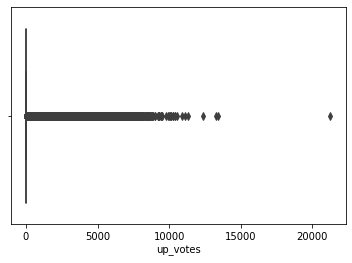

In [ ]:
# Detect Outliers in Upvotes if there is any
sns.boxplot(x=df['up_votes'])

In [ ]:
# The above plot clearly shows that up_votes has outliers.
# We will count the number of up_votes with the value > 20000.
# If it is possible to remove, then we will remove it

df[df['up_votes'] > 20000].count()

# It seems there is only one record has a up vote grater than 20,000. So we will remove that row.

print(f"Number of Rows in the Dataframe: {len(df)}")

# Drop outliers
df = df[df.up_votes < 20000]
print(f"Number of Rows in the Dataframe After Removing Outliers: {len(df)}")

Number of Rows in the Dataframe: 509236
Number of Rows in the Dataframe After Removing Outliers: 509235


**3. Statistical Analysis**

So, far we have a better informative dataset. Now we can see and extract some information from it. Now we can look into some analytical insights to make business decisions. Based on our data columns, we can divide our analysis into few groups such as:

1.   Up Votes Related Analysis
2.   News Related Analysis
3.   Author Related Analysis
4.   Country Related Analysis




**3.1 Up Votes Related Analysis**

Mr. X is interested in learning about the interests of the cusomers. 

**Business Model For this Analysis:**
Let us assume Mr. X is an owner of a publishing company. Before makes decisions he would like to know about some statistics.

**3.1 News Related Analysis**

Let us think Mr. X want to make some decision on advetising the news paper. And he would like to see the country of post.

Here, we can look into 3 major analysis.
1.   How does the count of the news change over years?
2.   How does the count of the news change over the day of the week?
3.   How does the count of the news change by country?



Count the number of upvotes over year, month and day


In [ ]:
# Let us see how the upvotes unique data column 
df['up_votes'].value_counts(ascending=True)

6011        1
5687        1
4273        1
5777        1
3730        1
        ...  
4       29917
3       36112
2       44195
1       46619
0       93555
Name: up_votes, Length: 5781, dtype: int64

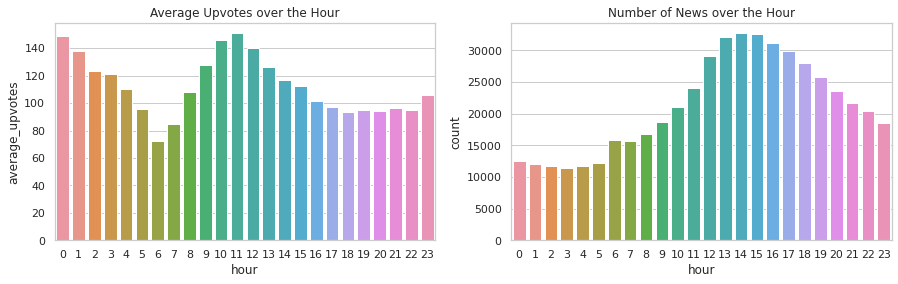

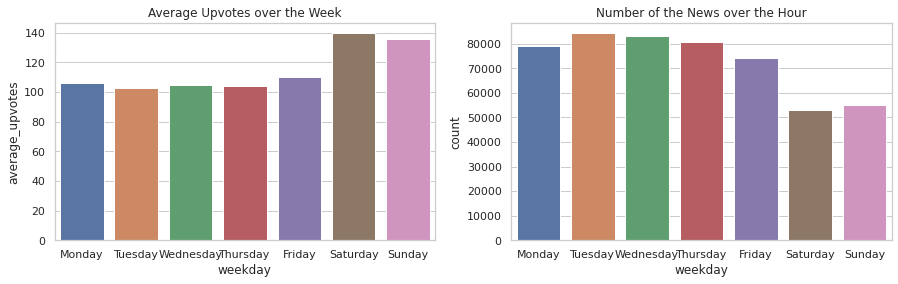

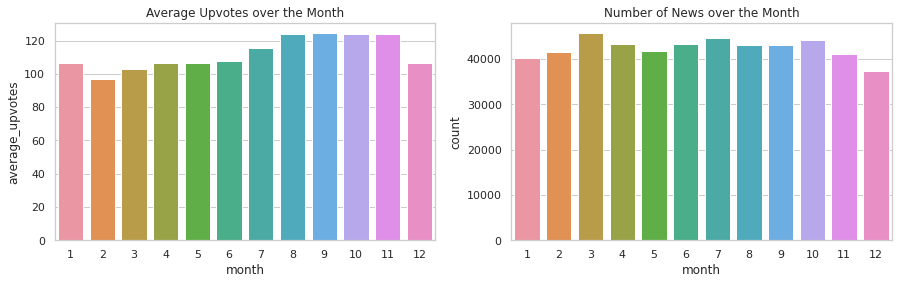

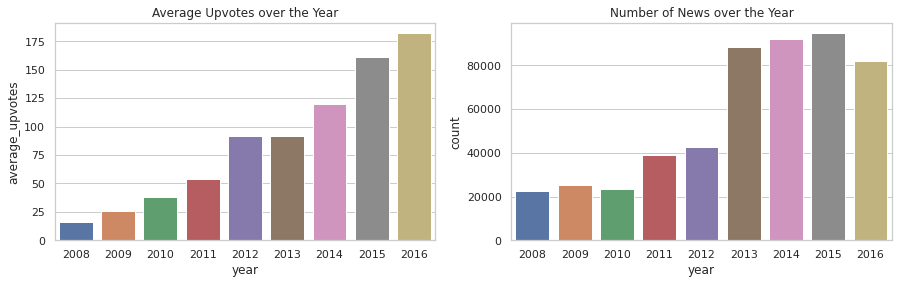

In [ ]:
sns.set_theme(style="whitegrid")
figure, ax = plt.subplots(1, 2, figsize=(15, 4))
group = df.groupby('hour').mean()['up_votes'].reset_index(name='average_upvotes')
graph=sns.barplot(x='hour',y='average_upvotes',data=group, ax=ax[0]).set(title='Average Upvotes over the Hour')
plot=sns.countplot(x='hour',data=df,ax=ax[1]).set(title='Number of News over the Hour')

figure, ax = plt.subplots(1, 2, figsize=(15, 4))
group = df.groupby('weekday').mean()['up_votes'].reset_index(name='average_upvotes')
sns.barplot(x='weekday',y='average_upvotes',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],data=group, ax=ax[0]).set(title='Average Upvotes over the Week')
plot=sns.countplot(x='weekday',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],data=df,ax=ax[1]).set(title='Number of the News over the Hour')

figure, ax = plt.subplots(1, 2, figsize=(15, 4))
group = df.groupby('month').mean()['up_votes'].reset_index(name='average_upvotes')
sns.barplot(x='month',y='average_upvotes',data=group, ax=ax[0]).set(title='Average Upvotes over the Month')
plot=sns.countplot(x='month',data=df,ax=ax[1]).set(title='Number of News over the Month')

figure, ax = plt.subplots(1, 2, figsize=(15, 4))
group = df.groupby('year').mean()['up_votes'].reset_index(name='average_upvotes')
sns.barplot(x='year',y='average_upvotes',data=group, ax=ax[0]).set(title='Average Upvotes over the Year')
plot=sns.countplot(x='year',data=df,ax=ax[1]).set(title='Number of News over the Year')



Author Related Statistics

[Text(0.5, 1.0, 'Rank the  Author based on the Day of the Post')]

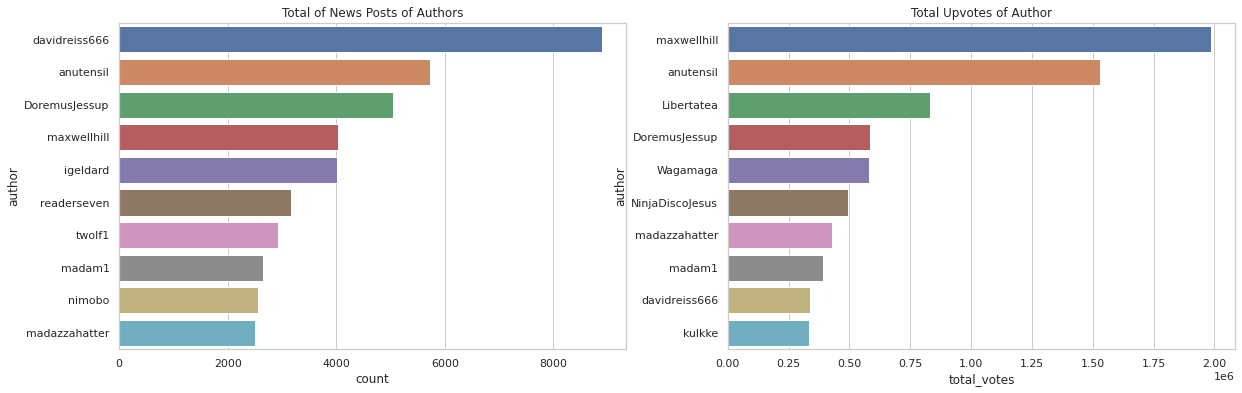

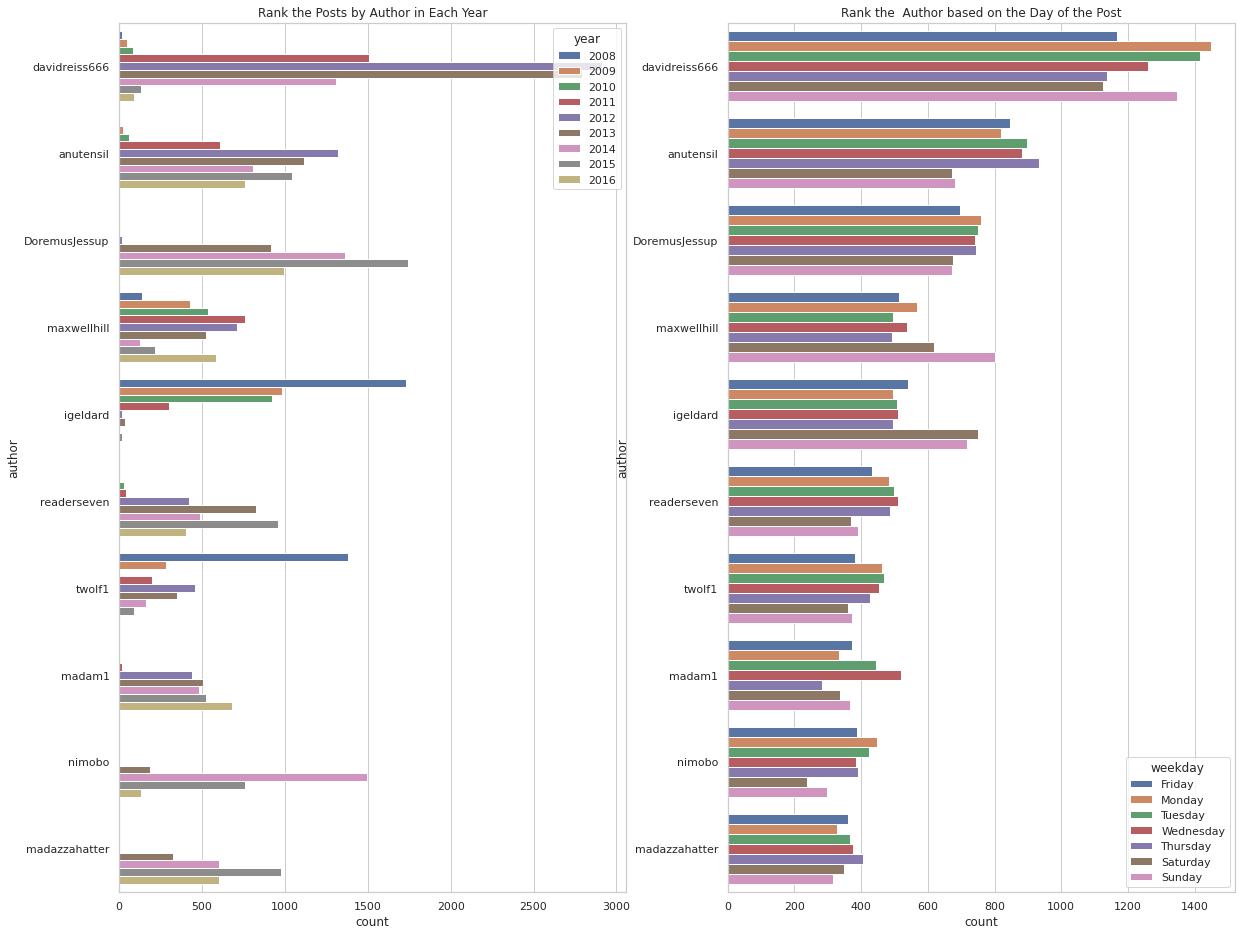

In [ ]:

figure, ax = plt.subplots(1, 2, figsize=(20, 6))
rank = 10

most_publish_authors=df['author'].value_counts().iloc[:rank]
sns.countplot(y=df['author'],order = most_publish_authors.index, ax=ax[0]).set(title='Total of News Posts of Authors')
# Save the top 20 authors who publishes most posts

most_upvotes_authors = df.groupby('author').sum()['up_votes'].reset_index(name='total_votes').sort_values(by='total_votes',ascending=False)
sns.barplot(y='author',x='total_votes',data=most_upvotes_authors.iloc[:rank],ax=ax[1]).set(title='Total Upvotes of Author')

figure, ax = plt.subplots(1, 2, figsize=(20, 16))

sns.countplot(y=df['author'],order = df['author'].value_counts().iloc[:rank].index, hue=df['year'],ax=ax[0]).set(title='Rank the Posts by Author in Each Year')
sns.countplot(y=df['author'],order = df['author'].value_counts().iloc[:rank].index, hue=df['weekday'],ax=ax[1]).set(title='Rank the  Author based on the Day of the Post')


[Text(0.5, 1.0, 'Rank the Posts by Country in Each Month')]

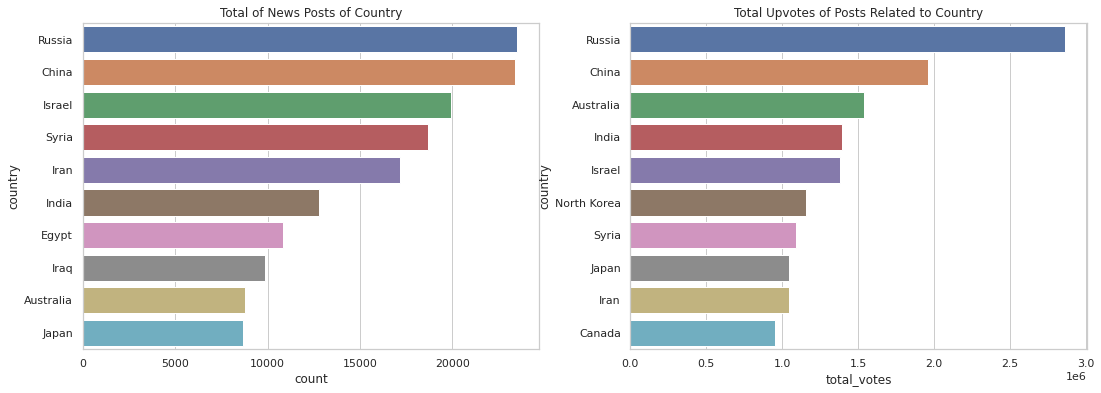

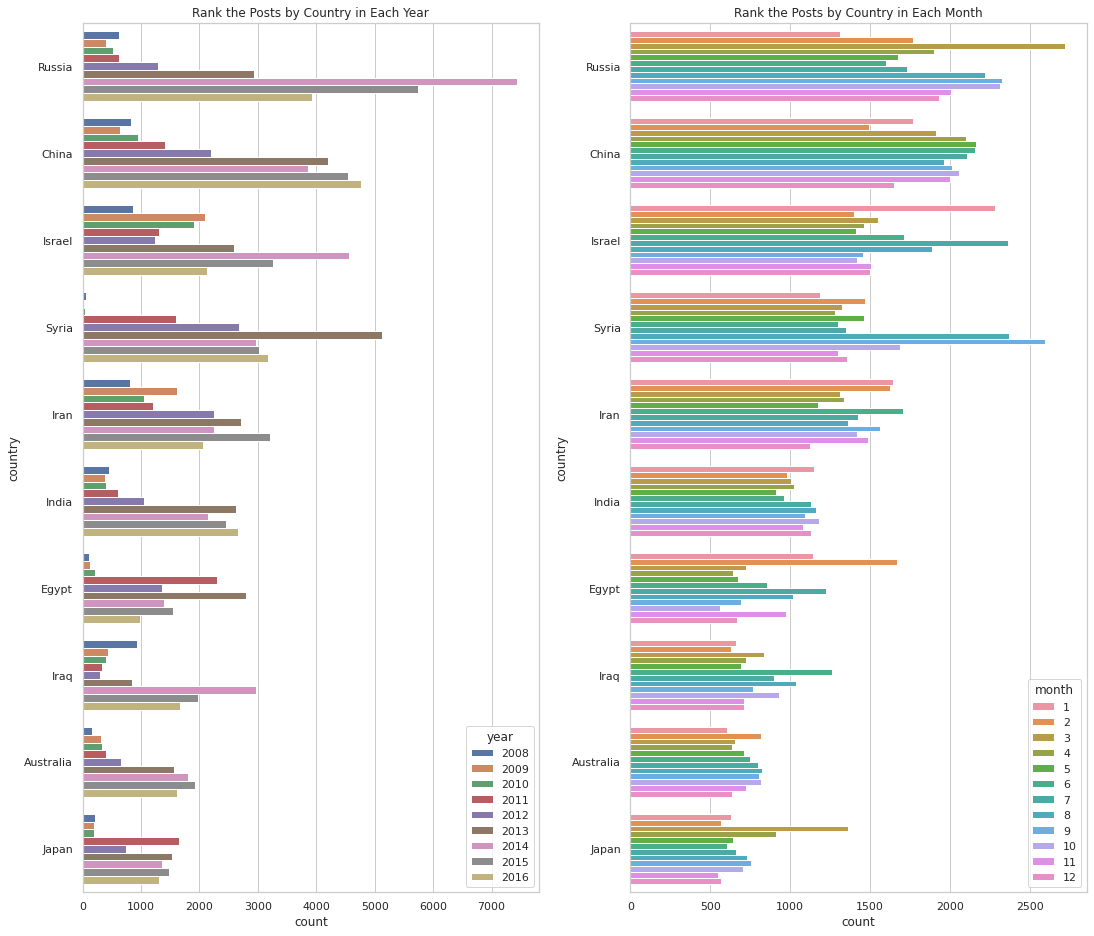

In [ ]:
# Country Related Analysis

#Which country has highest number of posts
#Which country has highest number of posts over the year
#Which country has highest number of posts over the month
#Which country related posts got highest upvotes
#Which is the famous contry among authors who submitted higher number of posts
#Which is the famous country among authors who have highest upvotes

figure, ax = plt.subplots(1, 2, figsize=(18, 6))
rank = 10

most_publish_country=country_df['country'].value_counts().iloc[:rank]
sns.countplot(y=df['country'],order = most_publish_country.index, ax=ax[0]).set(title='Total of News Posts of Country')

most_upvotes_country = country_df.groupby('country').sum()['up_votes'].reset_index(name='total_votes').sort_values(by='total_votes',ascending=False)
sns.barplot(y='country',x='total_votes',data=most_upvotes_country.iloc[:rank],ax=ax[1]).set(title='Total Upvotes of Posts Related to Country')

figure, ax = plt.subplots(1, 2, figsize=(18, 16))
sns.countplot(y=df['country'],order = country_df['country'].value_counts().iloc[:rank].index, hue=df['year'],ax=ax[0]).set(title='Rank the Posts by Country in Each Year')
sns.countplot(y=df['country'],order = country_df['country'].value_counts().iloc[:rank].index, hue=df['month'],ax=ax[1]).set(title='Rank the Posts by Country in Each Month')


In [ ]:
country_based_group=country_df.groupby(["country","author"]).size().reset_index(name="Time").sort_values(by=['Time'],ascending=False)
plot_df=country_based_group.iloc[:10]
plot_df['Time'] = plot_df['Time'].astype('int')
plot_df.head()

# we need to see which author submitted highest posts on whihc country

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,country,author,Time
23625,China,bob21doh,716
119020,Russia,vigorous,685
24067,China,davidreiss666,647
77982,Japan,madazzahatter,562
137863,Syria,uptodatepronto,447


In [ ]:
plot_df.columns

Index(['country', 'author', 'Time'], dtype='object')

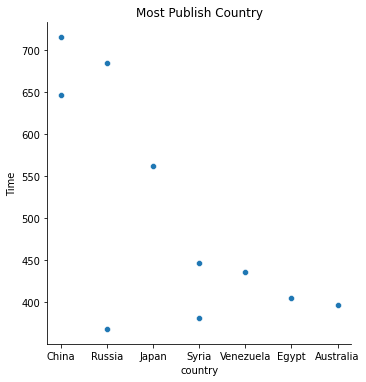

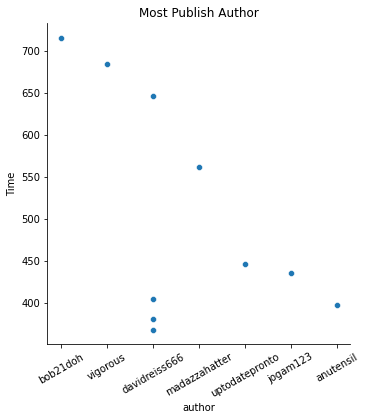

In [ ]:
sns.relplot(x="country", y="Time", data=plot_df).set(title='Most Publish Country')
g=sns.relplot(x="author", y="Time", data=plot_df).set(title='Most Publish Author')
g.set_xticklabels(rotation=30)

**4. Text Analysis**

So far we analyzed the data at other columns except text column. Now we need to explore the text column. 

4. 1 Clean Text Data

In [ ]:
data=df['title']
print(data)

0                         Scores killed in Pakistan clashes
1                          Japan resumes refuelling mission
2                           US presses Egypt on Gaza border
3              Jump-start economy: Give health care to all 
4           Council of Europe bashes EU&UN terror blacklist
                                ...                        
509231     Heil Trump : Donald Trump s  alt-right  white...
509232    There are people speculating that this could b...
509233            Professor receives Arab Researchers Award
509234    Nigel Farage attacks response to Trump ambassa...
509235    Palestinian wielding knife shot dead in West B...
Name: title, Length: 509235, dtype: object


In [ ]:
# Text Cleaning Functions (VERY NEW)
#df=usa_df
countries_c= {}

for country in pycountry.countries:
    countries_c[country.name] = country.alpha_2
  
stoplist= set(stopwords.words('english') + list(string.punctuation))

country_code=pd.read_csv('drive/My Drive/Eluvio_Folder/country_residents_name.csv',encoding='latin-1')
area_dict1 = dict(zip(country_code.Demonyms,country_code.Country))
area_dict1={key.lower() if type(key) == str else key: value for key, value in area_dict1.items()}
area_dict2 = dict(zip(country_code.Adjectivals,country_code.Country))
area_dict2={key.lower() if type(key) == str else key: value for key, value in area_dict2.items()}

emoji_pattern = re.compile("["
        "\U0001F600-\U0001F64F"  # emoticons
        "\U0001F300-\U0001F5FF"  # symbols & pictographs
        "\U0001F680-\U0001F6FF"  # transport & map symbols
        "\U0001F1E0-\U0001F1FF"  # flags (iOS)
        "\U00002500-\U00002BEF"  # chinese char
        "\U00002702-\U000027B0"
        "\U00002702-\U000027B0"
        "\U000024C2-\U0001F251"
        "\U0001f926-\U0001f937"
        "\U00010000-\U0010ffff"
        "\u2640-\u2642" 
        "\u2600-\u2B55"
        "\u200d"
        "\u23cf"
        "\u23e9"
        "\u231a"
        "\ufe0f"  # dingbats
        "\u3030" "]+", re.UNICODE)

def nltk_process(data):
  data = re.sub(r"\'s", " ", data)
  data = re.sub(r"/'s", " ", data)
  data = re.sub(r",", " ", data)
  data= re.sub(r"\.", "", data)
  data= re.sub(r"\^", " ^ ", data)
  data=data.replace('-',' ')
  data= re.sub(r"'", " ", data)
  data=re.sub("[!@#%^&*()[]{};:,./<>?\|`~-=_-+><]n", " ", data) 
  data = re.sub(r"U S", "US", data)
  data = re.sub(r"U S ", "US", data)
  data = re.sub(r"U N", "UN", data)
  data = re.sub(r"U N ", "UN", data)
  data = re.sub(r"@\S+", "", data)
  data=re.sub(r"New Zeland", "NewZeland", data)
  data=re.sub(r"Saudi Arabia", "SaudiArabia", data)
  data=re.sub(r"Sri Lanka", "SriLanka", data)
  data= re.sub(r"E U ", "EU", data)
  data= re.sub(r"Govt", "government", data)
  data= re.sub(r"luv ", "love", data)
  data=re.sub("al quaida","alqaida",data)
  data=re.sub("Al Quaida","alqaida",data)
  data=re.sub("AL QUAIDA","alqaida",data)
  #data=emoji.get_emoji_regexp().sub(r'',data)
  data = re.sub(r"US", "USA", data)
  data=emoji_pattern.sub(r'', data)
  data = re.sub(r"$", " ", data)
  data = re.sub(r"￥", " ", data)
  data = re.sub(r"£", " ", data)
  data = re.sub(r"€", " ", data)
  data = re.sub(r"《", " ", data)
  data = re.sub(r"�", " ", data)
  data=re.sub(r"[0-9]","", data)
  data=data.replace('\ufeff', '')
  
  return [word for word in word_tokenize(data) if word.lower() not in stoplist and not word.isdigit()]

def lemmetize(word_list):
  wordnet_lemmatizer = WordNetLemmatizer()
  tokenize_words=map(lambda x: x.replace(' ', ''), word_list)
  return [wordnet_lemmatizer.lemmatize(w,'v') for w in tokenize_words]

def country_code_change(word_list):
  for i in range (len(word_list)):
    if word_list[i] in area_dict1:
      #print(word_list[i])
      word_list[i]=str(area_dict1.get(word_list[i])).lower()
    elif word_list[i] in area_dict2 :
      word_list[i]=str(area_dict2.get(word_list[i])).lower()
  return word_list

def singularize_words_presentTense(word_list):
  #print(word_list)
  word_tags=nltk.pos_tag(word_list)
  #print(word_tags)
  for i in range(len(word_list)):
    if word_tags[i][1]=='NNS':
      word_list[i]=singularize(word_tags[i][0])
    elif word_tags[i][1]=='VBD' or word_tags[i][1]=='VBN' or word_tags[i][1]=='VBZ' or word_tags[i][1]=='VBP' or word_tags[i][1]=='VB' or word_tags[i][1]=='VBG' or word_tags[i][1]=='JJ':
      word_list[i]=conjugate(verb=word_tags[i][0],tense=PRESENT,number=PL)
  #print(word_list)
  return word_list

def remove_emojis(data):
  data=str(data)
  return emoji.get_emoji_regexp().sub(r'',data)

def preprocess(data):
  global counter
  data=nltk_process(data)
  data=lemmetize(data)
  data = [i for i in data if len(i) > 1]
  data=[item.lower() for item in data]
  data=country_code_change(data)
  data=singularize_words_presentTense(data)
  
  return data

In [ ]:
print('started!!!')
df['clean_text']= df.title.apply(preprocess)
df.head()

started!!!


,time_created,date_created,up_votes,title,author,year,month,day,weekday,country,hour,clean_text
0,2008-01-25 03:34:06,2008-01-25,3,Scores killed in Pakistan clashes,polar,2008,1,25,Friday,Pakistan,3,"[score, kill, pakistan, clash]"
1,2008-01-25 03:34:35,2008-01-25,2,Japan resumes refuelling mission,polar,2008,1,25,Friday,Japan,3,"[japan, resume, refuel, mission]"
2,2008-01-25 03:42:03,2008-01-25,3,US presses Egypt on Gaza border,polar,2008,1,25,Friday,Egypt,3,"[usa, press, egypt, gaza, border]"
3,2008-01-25 03:54:50,2008-01-25,1,Jump-start economy: Give health care to all,fadi420,2008,1,25,Friday,NaN,3,"[jump, start, economy, give, health, care]"
4,2008-01-25 15:25:20,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,mhermans,2008,1,25,Friday,NaN,15,"[council, europe, bash, eu, un, terror, blackl..."


In [ ]:
titles_token=df['clean_text']
print('Average word length of titles is {0:.0f}.'.format(np.mean(titles_token.apply(lambda x: len(x)))))
print('Max word length of titles is {0:.0f}.'.format(np.max(titles_token.apply(lambda x: len(x)))))
print('Min word length of titles is {0:.0f}.'.format(np.min(titles_token.apply(lambda x: len(x)))))

Average word length of titles is 10.
Max word length of titles is 38.
Min word length of titles is 0.


In [ ]:
# # #print if there are empty values in the clean title column
not_clean=[]
for index, row in df.iterrows():
  
  if row['clean_text']==[]:
    not_clean.append(row['title'])
print(len(not_clean))
print(not_clean)

6
['69, 127', '● ● ● ▬ ▬ ▬ ● ● ●', '?', '666', 'The Other 9/11', '.']


In [ ]:
# we have some not cleaned text and non-english texts in the title column. 
# Since the number is very small compared to the df size, we will remove those rows.
print(len(df))
df = df[~df.title.isin(not_clean)]
print(len(df))

509235
509229


**Now we have a clean data in all aspect. It is time to explore now**

In [ ]:
fdist = FreqDist()

for index,row in df.iterrows():
  record=row['clean_text']
  for word in record:fdist[word.lower()] += 1
frequencies= dict(sorted(fdist.items(), key=lambda x: x[1], reverse=True))

print(list(frequencies.items())[:20])

[('say', 45195), ('usa', 40615), ('china', 34979), ('russia', 31235), ('kill', 28601), ('new', 23381), ('attack', 21747), ('year', 21154), ('iran', 19950), ('world', 18206), ('government', 17422), ('state', 17240), ('israel', 16863), ('president', 15404), ('india', 15363), ('person', 15009), ('eu', 14062), ('report', 13391), ('war', 13336), ('un', 13317)]


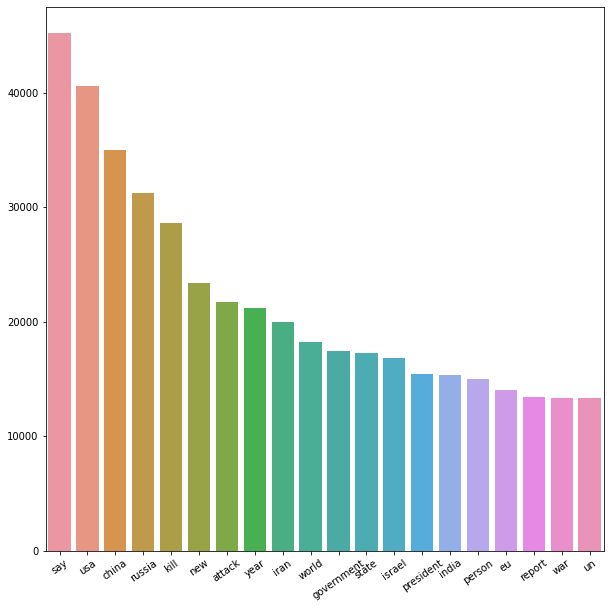

In [ ]:
## Conversion to Pandas series via Python Dictionary for easier plotting
all_fdist = pd.Series(frequencies).iloc[:20]

## Setting figure, ax into variables
figure, ax = plt.subplots(figsize=(10,10))

## Seaborn plotting using Pandas attributes + xtick rotation for ease of viewing
all_plot = sns.barplot(x=all_fdist.index, y=all_fdist.values, ax=ax)
plt.xticks(rotation=35);

**Build Machine Learning Models to Predict the Category of the News Title**

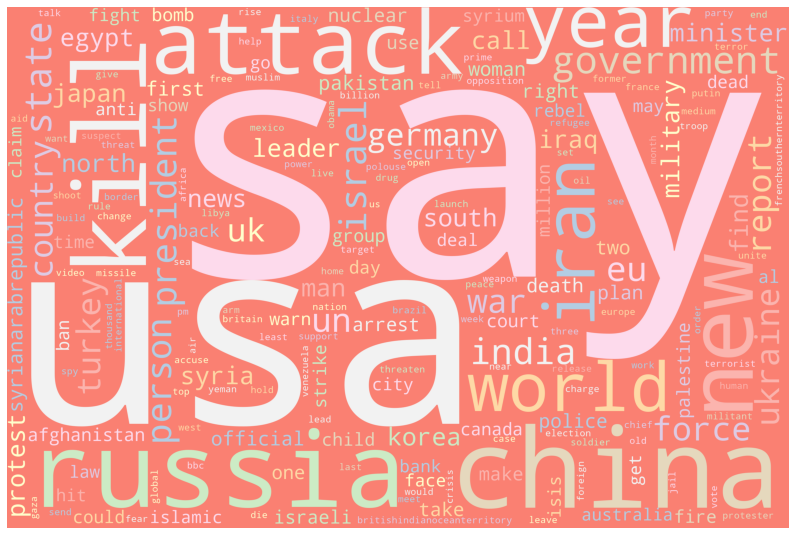

In [ ]:
# Visualize the word dense 

# Generate word cloud

# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(14, 16))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate_from_frequencies(frequencies)
# Plot
plot_cloud(wordcloud)

Approach:
We will use 2 gensim models created by bag of words method and tfidf method.


In [ ]:
# Create a frequency dictionary
freq=gensim.corpora.Dictionary(df['clean_text'])
print(f"Length of the Frequency Dictionary Before Cleaning: {len(freq)}")
freq.filter_extremes(no_below=5, no_above=0.5)
print(f"Length of the Frequency Dictionary After Cleaning: {len(freq)}")

#create a bag of words
bow_corpus=[freq.doc2bow(title) for title in df['clean_text']]

#create a tfidf vector
tfidf=models.TfidfModel(bow_corpus)
corpus_tfidf=tfidf[bow_corpus]


In [ ]:
# Decide the number of cluster groups
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=gensim.models.LdaMulticore(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=freq, corpus=bow_corpus, texts=df['clean_text'], start=2, limit=15, step=6)

limit=15; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#Ideal number of topics will maximize coherence and minimize the topic overlap based on Jaccard similarity.


In [ ]:
# Create the LDA model using bag of words
# Based on the above graph the optimal number of topics should be 8. 

lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word = freq, passes = 2, workers=2)
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word = freq, passes = 2, workers=4)

In [125]:
lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=8, id2word = freq, passes = 2, workers=4)
print("Topics from LDA Bag Of Words")
lda_model_tfidf.print_topics()
print('\nPerplexity from LDA Bag Of Words: ', lda_model.log_perplexity(bow_corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['clean_text'], dictionary=freq , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score from LDA  Bag of Words: ', coherence_lda)

topic #0 (0.125): 0.060*"china" + 0.016*"sea" + 0.009*"south" + 0.009*"japan" + 0.008*"usa" + 0.007*"say" + 0.007*"india" + 0.007*"ship" + 0.007*"migrant" + 0.007*"philippine"
topic #1 (0.125): 0.021*"eu" + 0.014*"world" + 0.013*"say" + 0.009*"china" + 0.009*"new" + 0.008*"deal" + 0.008*"brexit" + 0.007*"year" + 0.007*"country" + 0.007*"europe"
topic #2 (0.125): 0.028*"news" + 0.017*"bbc" + 0.017*"usa" + 0.010*"medium" + 0.009*"mexico" + 0.009*"say" + 0.008*"uk" + 0.008*"terror" + 0.007*"germany" + 0.007*"attack"
topic #3 (0.125): 0.015*"woman" + 0.015*"court" + 0.013*"child" + 0.013*"right" + 0.011*"arrest" + 0.010*"man" + 0.010*"human" + 0.009*"say" + 0.009*"charge" + 0.008*"year"
topic #4 (0.125): 0.018*"year" + 0.014*"india" + 0.012*"find" + 0.012*"death" + 0.010*"old" + 0.008*"pakistan" + 0.008*"china" + 0.007*"paris" + 0.007*"flight" + 0.006*"space"
topic #5 (0.125): 0.029*"usa" + 0.021*"say" + 0.018*"isis" + 0.016*"state" + 0.015*"turkey" + 0.014*"minister" + 0.014*"iran" + 0.01

Topics from Bag Of Words


-8.176 per-word bound, 289.2 perplexity estimate based on a held-out corpus of 509229 documents with 5004760 words
using WordOccurrenceAccumulator to estimate probabilities from sliding windows
WordOccurrenceAccumulator accumulated stats from 1000 documents
WordOccurrenceAccumulator accumulated stats from 2000 documents
WordOccurrenceAccumulator accumulated stats from 3000 documents



Perplexity from Bag Of Words:  -8.175822670217244


WordOccurrenceAccumulator accumulated stats from 4000 documents
WordOccurrenceAccumulator accumulated stats from 5000 documents
WordOccurrenceAccumulator accumulated stats from 6000 documents
WordOccurrenceAccumulator accumulated stats from 7000 documents
WordOccurrenceAccumulator accumulated stats from 8000 documents
WordOccurrenceAccumulator accumulated stats from 9000 documents
WordOccurrenceAccumulator accumulated stats from 10000 documents
WordOccurrenceAccumulator accumulated stats from 11000 documents
WordOccurrenceAccumulator accumulated stats from 12000 documents
WordOccurrenceAccumulator accumulated stats from 13000 documents
WordOccurrenceAccumulator accumulated stats from 14000 documents
WordOccurrenceAccumulator accumulated stats from 15000 documents
WordOccurrenceAccumulator accumulated stats from 16000 documents
WordOccurrenceAccumulator accumulated stats from 17000 documents
WordOccurrenceAccumulator accumulated stats from 18000 documents
WordOccurrenceAccumulator accum


Coherence Score from Bag Of Words:  0.3526075478906515


In [141]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=8, id2word = freq, passes = 2, workers=4)
print("Topics from LDA Tfidf")
lda_model_tfidf.print_topics()
print('\nPerplexity from LDA Tfidf: ', lda_model_tfidf.log_perplexity(corpus_tfidf))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model_tfidf, texts=df['clean_text'], dictionary=freq , coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score from LDA Tfidf: ', coherence_lda)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt

Topics from LDA Tfidf


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt


Perplexity from LDA Tfidf:  -8.207743366501361


WordOccurrenceAccumulator accumulated stats from 3000 documents
WordOccurrenceAccumulator accumulated stats from 4000 documents
WordOccurrenceAccumulator accumulated stats from 5000 documents
WordOccurrenceAccumulator accumulated stats from 6000 documents
WordOccurrenceAccumulator accumulated stats from 7000 documents
WordOccurrenceAccumulator accumulated stats from 8000 documents
WordOccurrenceAccumulator accumulated stats from 9000 documents
WordOccurrenceAccumulator accumulated stats from 10000 documents
WordOccurrenceAccumulator accumulated stats from 11000 documents
WordOccurrenceAccumulator accumulated stats from 12000 documents
WordOccurrenceAccumulator accumulated stats from 13000 documents
WordOccurrenceAccumulator accumulated stats from 14000 documents
WordOccurrenceAccumulator accumulated stats from 15000 documents
WordOccurrenceAccumulator accumulated stats from 16000 documents
WordOccurrenceAccumulator accumulated stats from 17000 documents
WordOccurrenceAccumulator accumu


Coherence Score from LDA Tfidf:  0.29392554863783676


In [ ]:
lda_model_bow_cluster=[]
lda_model_tfidf_cluster=[]
for i in range(len(df)):

  lda_model_bow_cluster.append(sorted(lda_model[bow_corpus[i]], key=lambda tup: tup[1], reverse=True)[0][0])
  lda_model_tfidf_cluster.append(sorted(lda_model_tfidf[corpus_tfidf[i]], key=lambda tup: tup[1], reverse=True)[0][0])

df['cluster_bow']=lda_model_bow_cluster
df['cluster_tfidf']=lda_model_tfidf_cluster

df.head()

,time_created,date_created,up_votes,title,author,year,month,day,weekday,country,hour,clean_text,cluster_bow,cluster_tfidf
0,2008-01-25 03:34:06,2008-01-25,3,Scores killed in Pakistan clashes,polar,2008,1,25,Friday,Pakistan,3,"[score, kill, pakistan, clash]",7,0
1,2008-01-25 03:34:35,2008-01-25,2,Japan resumes refuelling mission,polar,2008,1,25,Friday,Japan,3,"[japan, resume, refuel, mission]",3,6
2,2008-01-25 03:42:03,2008-01-25,3,US presses Egypt on Gaza border,polar,2008,1,25,Friday,Egypt,3,"[usa, press, egypt, gaza, border]",7,0
3,2008-01-25 03:54:50,2008-01-25,1,Jump-start economy: Give health care to all,fadi420,2008,1,25,Friday,NaN,3,"[jump, start, economy, give, health, care]",4,3
4,2008-01-25 15:25:20,2008-01-25,4,Council of Europe bashes EU&UN terror blacklist,mhermans,2008,1,25,Friday,NaN,15,"[council, europe, bash, eu, un, terror, blackl...",1,3


Machine Leaning Model to Predict Upvotes

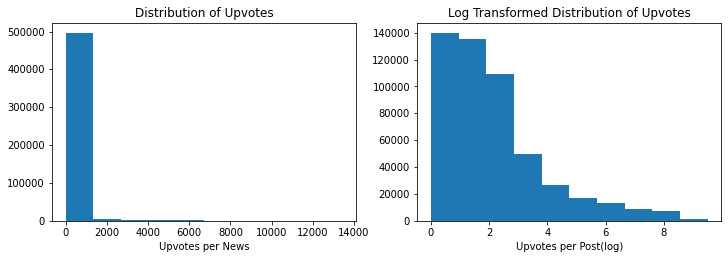

In [101]:

df['log_upvotes'] = np.log1p(df['up_votes'])
# Distribution of Upvotes
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
plt.title('Distribution of Upvotes')
plt.hist(df['up_votes'])
plt.xlabel('Upvotes per News')

plt.subplot(2,2,2)
plt.title('Log Transformed Distribution of Upvotes')
plt.hist(df['log_upvotes'])
plt.xlabel('Upvotes per Post(log)')
plt.show()

In [104]:
# split Data in to test and training sets

input_data=[]
for index, row in df.iterrows():
  s=' '.join(row['clean_text'])
  input_data.append(s)

train_titles, test_titles, train_labels, test_labels = train_test_split(input_data, 
                                                                        df.log_upvotes, 
                                                                        test_size=0.20,
                                                                        random_state=42)
# Tokenize with specified ngram then apply tf-idf
tfidf = TfidfVectorizer(ngram_range=(1,3)).fit(train_titles, train_labels)
train_titles_tfidf = tfidf.transform(train_titles)
test_titles_tfidf = tfidf.transform(test_titles)

In [162]:
# Apply Linear Regression
linear = LinearRegression()
linear.fit(train_titles_tfidf, train_labels)
test_predictions1 = linear.predict(test_titles_tfidf)

# # Apply Ridge Regression
reg = Ridge()
reg.fit(train_titles_tfidf, train_labels)
test_predictions2 = reg.predict(test_titles_tfidf)


# Apply Lasso Regression
lasso = Lasso()
lasso.fit(train_titles_tfidf, train_labels)
test_predictions3 = lasso.predict(test_titles_tfidf)

Results from the Models
Mean Train 2.071758656023754
Mean Test 2.0689444199378486
MAE from Linear Regression:  1.5350431672982974


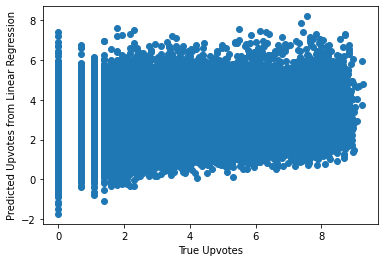

In [170]:
print('Results from the Models')
print('Mean Train', np.mean(train_labels))
print('Mean Test', np.mean(test_labels))
print('MAE from Linear Regression: ', mean_absolute_error(test_predictions1, test_labels))

plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Upvotes')
plt.ylabel('Predicted Upvotes from Linear Regression')

plt.show()

Results from the Models
Mean Train 2.071758656023754
Mean Test 2.0689444199378486
MAE from Ridge Regression:  1.4598005937156209


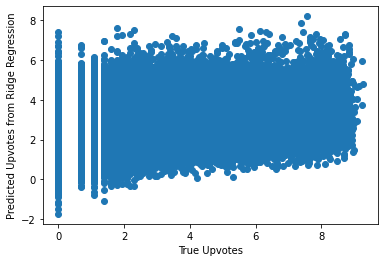

In [168]:
print('Results from the Models')
print('Mean Train', np.mean(train_labels))
print('Mean Test', np.mean(test_labels))
print('MAE from Ridge Regression: ', mean_absolute_error(test_predictions2, test_labels))

plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Upvotes')
plt.ylabel('Predicted Upvotes from Ridge Regression')

plt.show()

Results from the Models
Mean Train 2.071758656023754
Mean Test 2.0689444199378486
MAE from Ridge Regression:  1.3705433801598679


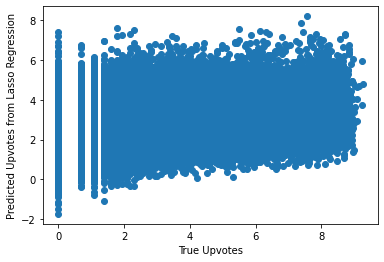

In [169]:
print('Results from the Models')
print('Mean Train', np.mean(train_labels))
print('Mean Test', np.mean(test_labels))
print('MAE from Ridge Regression: ', mean_absolute_error(test_predictions3, test_labels))

plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Upvotes')
plt.ylabel('Predicted Upvotes from Lasso Regression')

plt.show()